# SQL

By now, you should be familiar with the world of data science and the Pandas library. This assignment focuses on helping you get to grips with a new tool: SQL.

Through this homework, we will be working with SQL (specifically **pandasql**) by exploring a Spotify dataset containing song reviews and statistics. We will also conduct some text analysis of song reviews.

## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [2]:
import pandas as pd
import datetime as dt
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
print(pd.__version__ )

1.5.3




# Music for everyone!

<br>
<center><img src = "https://upload.wikimedia.org/wikipedia/commons/3/33/Spotify_logo13.png" width= "500" align ="center"/></center>
<br>

We'll be working with a dataset containing Top Tracks on Spotify in 2017, along with their reviews and rankings.

In this homework, we'll be exploring the following attributes of the song data:

*   Song-specific metadata (eg. artist name) 

*   The songs' rankings based on date and listener location

*   Acoustic / musical properties of the song, eg. danceability


We'll be loading this data into various dataframes and querying them. We will primarily be using PandaSQL for these tasks. However, for some of the initial questions, we'll ask you to perform the same operations in Pandas. The purpose of conducting the same tasks in both Pandas and PandaSQL is to help you become more familiar with the similarites and differences of these two tools.

## Part 1: Load & Process our Datasets

Before we get into the data, we first need to load and clean our datasets. 

# Metadata
You'll be working with three CSV files:
- `spotify_features.csv`
- `songs_features.csv`
- `spotify_rankings.csv`

The file `spotify_features.csv` contains musical / acoustic data for each song, obtained via the Spotify API.

The file `songs_features.csv` includes the names, artists, Spotify URLs of the Top Songs of 2017. 

Each row in the file `spotify_rankings.csv` contains a song's ranking on a specific day in a particular region, where regions are sorted alphabetically.

For example, the first 200 rows of `spotify_rankings.csv` represent the ranks of various songs on 1st of January in Argentina. The next 200 rows contain the  rankings of songs during the 2nd of January in Argentina. 

Note that the Spotify dataset may containing missing data, so don't rely on the interval between successive dates as 200 rows. 

Instead, it would be preferable to read all the data and then filter by region & date. This way, you can be sure that you have the required data.


**TODO**:
* Load `spotify_songs.csv` and save the data to a dataframe called `songs_df`.
* Load `spotify_rankings.csv` and save the data to a dataframe called `rankings_df`.
* Load `spotify_features.csv` and save the data to a dataframe called `features_df` without the index column being included.

**Note**: If you see a column called `Unnamed: 0` when loading the data,be sure to drop this column while loading the dataset. This is necessary for one to receive full credit in all the following parts of this homework.

In [8]:
# TODO: Import the datasets to pandas dataframes -- make sure the dataframes are named correctly! 
songs_df = pd.read_csv('spotify_songs.csv')
rankings_df = pd.read_csv('spotify_rankings.csv')
features_df = pd.read_csv('spotify_features.csv')

In [9]:
# view songs_df to make sure the import was successful
songs_df

,id,name,artists,duration_ms,time_signature,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,4,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,4,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,4,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,4,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,4,Your voice is awesome
...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,4,Good strong voice
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,4,good movie sound track
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,4,Good melody. A little different
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,4,Good lyrics...


In [10]:
# view rankings_df to make sure the import was successful
rankings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
rankings_df

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [11]:
# view features_df to make sure the import was successful
features_df.drop(['Unnamed: 0'], axis=1, inplace=True)
features_df

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977
1,5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931
2,4aWmUDTfIPGksMNLV2rQP,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833
3,6RUKPb4LETWmmr3iAEQkt,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019
4,3DXncPQOG4VBw3QHh3S81,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817
96,0QsvXIfqM0zZoerQfsI9l,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797
97,7mldq42yDuxiUNn08nvzH,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963
98,7i2DJ88J7jQ8K7zqFX2fW,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075


### 1.1 Data Preprocessing
We are now going to clean our dataframes `songs_df` and `rankings_df` by performing the following tasks:       
1) fixing columns        
2) changing datatypes             
3) handling nulls.

First, let us view the first few rows of `songs_df`. You may also call `.info()` and check the cardinality of each column to view the specifics of the dataframe. This is a good first step to take during Exploratory Data Analysis (EDA).

In [12]:
# view info information regarding movies_df
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    object
 1   name            100 non-null    object
 2   artists         100 non-null    object
 3   duration_ms     100 non-null    int64 
 4   time_signature  100 non-null    int64 
 5   reviews         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


#### 1.1.1 Cleaning `songs_df`

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls. With this information, we can now clean our dataframe. 

**TODO**:
* Drop the column `time_signature`.

In [13]:
# TODO: clean songs_df
songs_df.drop(['time_signature'], axis=1, inplace=True)
songs_df

,id,name,artists,duration_ms,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome
...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,Good melody. A little different
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...


#### 1.1.2 Processing Rankings

`rankings_df` contains a `URL` column that represents the URL of the Spotify track. This URL contains the track ID. We would like to extract the ID corresponding to each song. 

To maintain consistency, begin by sorting this dataframe according to `Date` in ascending order. 

**TODO**:
- Sort the `Date` column in ascending order
- Split the strings in the `URL` column to extract the ID for each song, and save this as a new column called `ID` in `rankings_df`
- Drop the `URL` column

**Example**:
>URL | ID
>--- | ---
> https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTf | 3AEZUABDXNtecAOSC1qTf

After performing these steps, `rankings_df` should have the following schema:
**Final Schema**:
>Position | Track Name | Artist | Streams | Date | Region | ID
>--- | --- | --- |--- |--- |--- |--- |

**Hint**: Note the delimiter within the URL and consult the documentation for the `.split()` function

In [15]:
# TODO: extract ID and drop URL
rankings_df.sort_values('Date', inplace=True)
rankings_df['ID'] = rankings_df['URL'].str.split('/').str[4]
rankings_df.drop(['URL'], axis=1, inplace=True)
rankings_df.reset_index(inplace=True)
rankings_df.drop(['index'], axis=1, inplace=True)
rankings_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
1,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
3,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
4,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...
3441192,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
3441193,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
3441194,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
3441195,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


#### 1.1.3 Cleaning `rankings_df`

Now let's clean `rankings_df` and make it usable.

In [17]:
# Examine rankings_df using the .info() function
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Position    int64 
 1   Track Name  object
 2   Artist      object
 3   Streams     int64 
 4   Date        object
 5   Region      object
 6   ID          object
dtypes: int64(2), object(5)
memory usage: 183.8+ MB



**TODO**:
* Drop all rows that have a null value in `rankings_df`
* Convert column `Date` into type `datetime64[ns]`.


In [18]:
#TODO: 
rankings_df.dropna(inplace=True)
rankings_df['Date'] = pd.to_datetime(rankings_df['Date'])
rankings_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
1,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
3,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
4,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...
3441192,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
3441193,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
3441194,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
3441195,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


### 1.2 Your Sandbox 

.info() is just one of many basic tools that you can use for Exploratory Data Analysis (EDA). Instead of throwing you straight into the deep end, we wanted to give you a chance to take some time and explore the data on your own.

Some suggestions to get you started:
- `df.head()`
- `df.describe()`
- `Series.unique()`

In [20]:
# Your EDA here! Feel free to add more cells
rankings_df.describe()

,Position,Streams
count,3.440540e+06,3.440540e+06
mean,9.465220e+01,5.188452e+04
std,5.739412e+01,2.017733e+05
min,1.000000e+00,1.001000e+03
25%,4.500000e+01,3.321000e+03
50%,9.200000e+01,9.226000e+03
75%,1.430000e+02,2.965600e+04
max,2.000000e+02,1.138152e+07


## Part 2: Exploring the Data with PandasSQL (and Pandas)

Now that you're more familiar with the dataset, we'll now introduce you to SQL language. Specifically, we'll be using **pandasql**: a library that allows users to query Pandas DataFrames using SQL statements.

The typical flow of using pandasql (shortened to **ps**) is as follows:
1. Write a SQL query in the form of a string (Tip: use triple quotes """x""" to write multi-line strings)
2. Run the query using **ps.sqldf(your_query, locals())**

PandaSQL is convenient as it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes `songs_df`, `rankings_df` and `features_df` that you have created above!

Given that SQL is a brand new language, we wanted to give you a chance to directly compare the similarities &differences of Pandas and SQL. 
Thus, for each of the simpler queries, we ask that you **perform the tasks in each question twice: once with Pandas and once with PandaSQL**. 

Each answer (unless specified otherwise) will thus require two dataframes, one dataframe whose name is prefixed with `pd_`, and another dataframe whose name is prefixed with `sql_`. You will submit these two dataframes seperately to the autograder. **We will be reviewing your code to make sure your code for each dataframe is written in the correct language.**


### 2.1 Bruno Mars songs


#### 2.1.1 How many Bruno Mars' songs were popular in 2017?

Note: Only Pandas is required for this question.
The dataframe `songs_df` contains all top songs in 2017. We want to know whether Bruno Mars was a part of it (he obviously was) - but which of his songs made it to the top?

**TODO:** Using **pandas**, filter out the songs and reviews from `songs_df` that were by `Bruno Mars`. Then, save this data to a DataFrame called `bruno_df` that has the following schema:

>name | reviews
>--- | ---



In [21]:
# TODO: Use pandas to obtain songs by `Bruno Mars`
bruno_df = songs_df[songs_df['artists'] == 'Bruno Mars'][['name', 'reviews']]
bruno_df

,name,reviews
8,That's What I Like,You have a really cool voice! I like the way y...
59,24K Magic,Lyrics are very good. Backing sounds nice.


#### 2.1.2 How many of Bruno Mars' songs were deemed "good"?
We now want to see which of these songs contained the word "good" in the `reviews` column.

**TODO:** Using **pandasql**, update `bruno_df` so that it only contains songs that have the word 'good' in the `reviews` column.

In [23]:
# TODO: Use pandasql to obtain only "good" songs of bruno mars
good_song_query = """SELECT name, reviews FROM bruno_df WHERE reviews LIKE '%good%'"""

bruno_df = ps.sqldf(good_song_query, locals())
bruno_df

,name,reviews
0,24K Magic,Lyrics are very good. Backing sounds nice.


### 2.2 Finding the hit songs



#### 2.2.1 Extract the total no. of streams
We now want to see what songs formed the top 75% of the year 2017 from `rankings_df`. We can measure the popularity of the songs using the total number of streams the song received.

**TODO**: 
* Find the total number of streams per song and save it into a dataframe called `streams_df`
* Understand the quartile ranges in `streams_df`

**Hint**: you may find it helpful to look up `.describe()` to understand quartiles. It would be helpful to save the necessary quartile value to use in the querying section that follows.




In [25]:
# TODO: Using pandas extract the total number of streams per song from rankings_df
streams_df = rankings_df.groupby('Track Name').sum()
streams_df.reset_index(inplace=True)
streams_df

<ipython-input-25-760499cd22dd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  streams_df = rankings_df.groupby('Track Name').sum()


,Track Name,Position,Streams
0,"""All That Is or Ever Was or Ever Will Be""",383,7311
1,"""Read All About It, Pt. III""",2306,57025
2,#99,1126,31826
3,#Askip,3184,296862
4,#Biziz - feat. Lil Bege,4488,403591
...,...,...,...
18592,전야 前夜 The Eve,17063,976392
18593,지나갈 테니 Been Through,1180,87456
18594,쩔어 DOPE,7545,209493
18595,피 땀 눈물,2757,68673


#### 2.2.2 Top 75% of streams

Now that we've seen the distribution of the streams, we'd like to extract songs with streams within the top 75%, i.e 75% or more streams. For this part, use the quartile values you got via the `.describe()` function.

**TODO**: Using **pandas**, 
Filter out songs from `streams_df` whose stream count is in the top 75%, then save this data as the Pandas dataframe `pd_top_streams`.

In [27]:
# TODO: Using pandas extract the top 75% based on number of streams
quartile_value = streams_df['Streams'].describe()['25%']

pd_top_streams = streams_df[streams_df['Streams'] >= quartile_value]
pd_top_streams = pd_top_streams.reset_index()[['Track Name', 'Position', 'Streams']]
pd_top_streams

,Track Name,Position,Streams
0,"""Read All About It, Pt. III""",2306,57025
1,#99,1126,31826
2,#Askip,3184,296862
3,#Biziz - feat. Lil Bege,4488,403591
4,#CTZK,20515,669563
...,...,...,...
13943,전야 前夜 The Eve,17063,976392
13944,지나갈 테니 Been Through,1180,87456
13945,쩔어 DOPE,7545,209493
13946,피 땀 눈물,2757,68673


Repeat this process using **pandasql**, and save the data in the variable `sql_top_streams`

In [29]:
# TODO: Using pandasql extract the top 75% based on number of streams
top_query = """
SELECT *
FROM streams_df
WHERE Streams >= (
    SELECT Streams
    FROM streams_df
    ORDER BY Streams DESC
    LIMIT 1
    OFFSET (
        SELECT CAST(COUNT(*) * 0.75 AS INTEGER)
        FROM streams_df
    )
)
"""

sql_top_streams = ps.sqldf(top_query, locals())
sql_top_streams

,Track Name,Position,Streams
0,"""Read All About It, Pt. III""",2306,57025
1,#99,1126,31826
2,#Askip,3184,296862
3,#Biziz - feat. Lil Bege,4488,403591
4,#CTZK,20515,669563
...,...,...,...
13943,전야 前夜 The Eve,17063,976392
13944,지나갈 테니 Been Through,1180,87456
13945,쩔어 DOPE,7545,209493
13946,피 땀 눈물,2757,68673


### 2.3 Duration of songs


Now that we know which songs are hits, we'd like to listen to songs that are not too short nor too long.

**TODO**: Using **pandas**, 
Filter out songs from `songs_df` whose duration is between 3 and 5 minutes.

- Create a new column in `songs_df` called "duration_min" that converts the duration in "duration_ms" from milliseconds to minutes
- Extract only songs whose duration is at least 3 minutes and at most 5 minutes. Then, save the output to `ideal_songs_df`.


In [31]:
# TODO: pandas version
songs_df['duration_min'] = songs_df['duration_ms'] / 60000

ideal_songs_df = songs_df[(songs_df['duration_min'] >= 3) & (songs_df['duration_min'] <= 5)]
ideal_songs_df

,id,name,artists,duration_ms,reviews,duration_min
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.,3.895217
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...,3.813783
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...,3.803333
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...,4.119333
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome,4.810000
...,...,...,...,...,...,...
94,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice,3.988217
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track,3.467550
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...,3.580033


### 2.4 Who are the highest ranked artists?

Which artists have been ranked #1 the most times in 2017?

**TODO**: Using the dataframe `rankings_df`, perform the following tasks twice, once using **pandas** and once using **pandasql**:
- Extract the names of artist that have `position` as 1, and store this data in `pd_pos_df`
- Using `pd_pos_df`, find the number of times each artist was ranked #1
- Get the Top 10 artists, i.e. the 10 artists which have been ranked #1 the most times. 

The dataframe `pd_pos_df` should have the following schema:

>Artist | Position
>--- | ---

In [33]:
# TODO: pandas version
pd_pos_df = rankings_df[rankings_df['Position'] == 1]
pd_pos_df.rename(columns={'Position': 'Position_x', 'Streams': 'Position'}, inplace=True)
pd_pos_df = pd_pos_df.groupby('Artist').count()
pd_pos_df = pd_pos_df.sort_values('Position', ascending=False)
pd_pos_df = pd_pos_df.reset_index()[['Artist', 'Position']]
pd_pos_df = pd_pos_df.head(10)
pd_pos_df

<ipython-input-33-9443be1fded8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_pos_df.rename(columns={'Position': 'Position_x', 'Streams': 'Position'}, inplace=True)


,Artist,Position
0,Luis Fonsi,4085
1,Ed Sheeran,3780
2,Post Malone,1737
3,J Balvin,1195
4,Maluma,900
5,Natti Natasha,416
6,Bad Bunny,311
7,Taylor Swift,304
8,Danny Ocean,291
9,Camila Cabello,272


In [34]:
# TODO: pandasql version
pos_query = """ 
SELECT Artist, COUNT(Streams) AS Position
FROM rankings_df
WHERE Position = 1
GROUP BY Artist
ORDER BY Position DESC
LIMIT 10
"""

sql_pos_df = ps.sqldf(pos_query, locals())
sql_pos_df

,Artist,Position
0,Luis Fonsi,4085
1,Ed Sheeran,3780
2,Post Malone,1737
3,J Balvin,1195
4,Maluma,900
5,Natti Natasha,416
6,Bad Bunny,311
7,Taylor Swift,304
8,Danny Ocean,291
9,Camila Cabello,272


### 2.5 Popular Artists!

Are there artists whose songs are streamed more often than others? Let's find out!

**TODO:**

Perform the following task involving the dataframe `rankings_df` twice, once using **pandas** and once using **pandasql**. Call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

- Consider rows in `rankings_df` that are during Summer 2017 
  - Note: Consider the duration of summer to be from 15th June 2017 to 16th September 2017 (both dates inclusive)
- Find the total number of streams corresponding to each artist, then store this data in a new column called `Number`. 
- Sort this dataframe on the `Number` column so that the most popular artists appear first (i.e. sort according to the `Number` column in descending order).
- Remember to call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

The dataframes `pd_summer_df` and `sql_summer_df` should both have the following schema:

>Artist | Number
>--- | ---



In [36]:
# TODO: pandas
pd_summer_df = rankings_df[(rankings_df['Date'] >= '2017-06-15') & (rankings_df['Date'] <= '2017-09-16')]
pd_summer_df.rename(columns={'Streams': 'Number'}, inplace=True)
pd_summer_df = pd_summer_df.groupby('Artist').sum()
pd_summer_df = pd_summer_df.sort_values('Number', ascending=False)
pd_summer_df = pd_summer_df.reset_index()[['Artist', 'Number']]
pd_summer_df

<ipython-input-36-84d3e503d1bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_summer_df.rename(columns={'Streams': 'Number'}, inplace=True)
<ipython-input-36-84d3e503d1bc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd_summer_df = pd_summer_df.groupby('Artist').sum()


,Artist,Number
0,Ed Sheeran,1331033447
1,DJ Khaled,1298364289
2,Luis Fonsi,1186212514
3,Calvin Harris,1033045563
4,J Balvin,1021849673
...,...,...
3096,Á Móti Sól,1052
3097,Huntar,1049
3098,The Panas,1032
3099,Stefán Hilmarsson,1022


In [37]:
#TODO: pandasql
summer_query = """
SELECT Artist, SUM(Streams) AS Number
FROM rankings_df
WHERE Date BETWEEN '2017-06-15' AND '2017-09-17'
GROUP BY Artist
ORDER BY Number DESC
"""

sql_summer_df = ps.sqldf(summer_query, locals())
sql_summer_df

,Artist,Number
0,Ed Sheeran,1331033447
1,DJ Khaled,1298364289
2,Luis Fonsi,1186212514
3,Calvin Harris,1033045563
4,J Balvin,1021849673
...,...,...
3096,Á Móti Sól,1052
3097,Huntar,1049
3098,The Panas,1032
3099,Stefán Hilmarsson,1022


### 2.6 Which songs are danceable but also mellow?

Now let us switch gears and examine `songs_df` and `features_df`. In particular, we want to find the songs with high danceability and low tempo.

**TODO**: Perform the following tasks, once using **pandas** and once using **pandasql**:
- Before performing any operations,  round the `danceability` column to one decimal place, and call the resultant column `r_danceability`. This will allow us to conduct a more general (coarser) analysis of the data.
- Merge `songs_df` and `features_df`, then sort the songs with danceability in *descending* order and tempo in *ascending* order. (When sorting, make sure to use the `r_danceability` column.)
- Call the output dataframe `pd_songs_features_df` or `sql_songs_features_df` based on whether you used pandas or pandasql.


In [39]:
# TODO: pandas
features_df['r_danceability'] = features_df['danceability'].round(1)

pd_songs_features_df = pd.merge(songs_df, features_df, how='left', on='id')
pd_songs_features_df.sort_values(['r_danceability', 'tempo'], ascending=[False, True], inplace=True)
pd_songs_features_df

,id,name,artists,duration_ms,reviews,duration_min,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,r_danceability
94,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783,0.884,0.346,8.0,-8.228,0.0,0.3510,0.0151,0.000007,0.0871,0.3760,75.016,0.9
42,5bcTCxgc7xVfSaMV3RuVk,Feels,Calvin Harris,223413,Overall quite a nice sound.,3.723550,0.893,0.745,11.0,-3.105,0.0,0.0571,0.0642,0.000000,0.0943,0.8720,101.018,0.9
47,6mICuAdrwEjh6Y6lroV2K,Chantaje,Shakira,195840,NICE TUNE WITH SOME NEAT CHORD CHANGES....VERY...,3.264000,0.852,0.773,8.0,-2.921,0.0,0.0776,0.1870,0.000030,0.1590,0.9070,102.034,0.9
38,6EpRaXYhGOB3fj4V2uDkM,Strip That Down,Liam Payne,204502,Rich clean vocals. Nice incidental instrumenta...,3.408367,0.869,0.485,6.0,-5.595,1.0,0.0545,0.2460,0.000000,0.0765,0.5270,106.028,0.9
91,4c2W3VKsOFoIg2SFaO6DY,Your Song,Rita Ora,180757,"Great music ,Great voice ,arrangement, etc.",3.012617,0.855,0.624,1.0,-4.093,1.0,0.0488,0.1580,0.000000,0.0513,0.9620,117.959,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,205947,"Nice melodies, especially in the beginning. Ha...",3.432450,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.000010,0.1220,0.1420,199.864,0.5
22,5uCax9HTNlzGybIStD3vD,Say You Won't Let Go,James Arthur,211467,"truely unique, i like it",3.524450,0.358,0.557,10.0,-7.398,1.0,0.0590,0.6950,0.000000,0.0902,0.4940,85.043,0.4
63,6520aj0B4FSKGVuKNsOCO,Chained To The Rhythm,Katy Perry,237734,"Like the recording .nice and clear,smooth",3.962233,0.448,0.801,0.0,-5.363,1.0,0.1650,0.0733,0.000000,0.1460,0.4620,189.798,0.4
66,5hYTyyh2odQKphUbMqc5g,"How Far I'll Go - From ""Moana""",Alessia Cara,175517,Kind of reminds me of new music.,2.925283,0.314,0.555,9.0,-9.601,1.0,0.3700,0.1570,0.000108,0.0670,0.1590,179.666,0.3


In [41]:
# TODO: pandasql version
song_feature_query = """
SELECT *
FROM songs_df
    LEFT JOIN features_df
    ON songs_df.id = features_df.id
ORDER BY r_danceability DESC, tempo ASC
"""

sql_song_features_df = ps.sqldf(song_feature_query, locals())
sql_song_features_df

,id,name,artists,duration_ms,reviews,duration_min,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,r_danceability
0,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783,2fQrGHiQOvpL9UgPvtYy6,0.884,0.346,8.0,-8.228,0.0,0.3510,0.0151,0.000007,0.0871,0.3760,75.016,0.9
1,5bcTCxgc7xVfSaMV3RuVk,Feels,Calvin Harris,223413,Overall quite a nice sound.,3.723550,5bcTCxgc7xVfSaMV3RuVk,0.893,0.745,11.0,-3.105,0.0,0.0571,0.0642,0.000000,0.0943,0.8720,101.018,0.9
2,6mICuAdrwEjh6Y6lroV2K,Chantaje,Shakira,195840,NICE TUNE WITH SOME NEAT CHORD CHANGES....VERY...,3.264000,6mICuAdrwEjh6Y6lroV2K,0.852,0.773,8.0,-2.921,0.0,0.0776,0.1870,0.000030,0.1590,0.9070,102.034,0.9
3,6EpRaXYhGOB3fj4V2uDkM,Strip That Down,Liam Payne,204502,Rich clean vocals. Nice incidental instrumenta...,3.408367,6EpRaXYhGOB3fj4V2uDkM,0.869,0.485,6.0,-5.595,1.0,0.0545,0.2460,0.000000,0.0765,0.5270,106.028,0.9
4,4c2W3VKsOFoIg2SFaO6DY,Your Song,Rita Ora,180757,"Great music ,Great voice ,arrangement, etc.",3.012617,4c2W3VKsOFoIg2SFaO6DY,0.855,0.624,1.0,-4.093,1.0,0.0488,0.1580,0.000000,0.0513,0.9620,117.959,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,205947,"Nice melodies, especially in the beginning. Ha...",3.432450,4pdPtRcBmOSQDlJ3Fk945,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.000010,0.1220,0.1420,199.864,0.5
96,5uCax9HTNlzGybIStD3vD,Say You Won't Let Go,James Arthur,211467,"truely unique, i like it",3.524450,5uCax9HTNlzGybIStD3vD,0.358,0.557,10.0,-7.398,1.0,0.0590,0.6950,0.000000,0.0902,0.4940,85.043,0.4
97,6520aj0B4FSKGVuKNsOCO,Chained To The Rhythm,Katy Perry,237734,"Like the recording .nice and clear,smooth",3.962233,6520aj0B4FSKGVuKNsOCO,0.448,0.801,0.0,-5.363,1.0,0.1650,0.0733,0.000000,0.1460,0.4620,189.798,0.4
98,5hYTyyh2odQKphUbMqc5g,"How Far I'll Go - From ""Moana""",Alessia Cara,175517,Kind of reminds me of new music.,2.925283,5hYTyyh2odQKphUbMqc5g,0.314,0.555,9.0,-9.601,1.0,0.3700,0.1570,0.000108,0.0670,0.1590,179.666,0.3


### 2.7 Do we like the same songs?

#### 2.7.1 Which regions have the most streams?

**TODO**: 
Perform the following tasks, once using **pandas** and once using **pandasql**:
- Extract rows belonging to the top 2 regions that have the most streams. 
- Store your output in a new dataframe called `pd_top_regions_df` or `sql_top_regions_df` based on whether you used pandas or pandasql. Both of these dataframes should have same schema as `rankings_df`. Sort both these dataframes in descending order by `Streams`.

Note: Since we want to focus on specific regions, we should disregard rows where the `Region` column has the value `"global"`.

In [43]:
# TODO: pandas
top2_regions = rankings_df[rankings_df['Region'] != 'global']
top2_regions = top2_regions.groupby('Region').sum()
top2_regions.sort_values('Streams', ascending=False, inplace=True)
top2_regions.reset_index(inplace=True)

pd_top_regions_df = rankings_df[(rankings_df['Region'] == top2_regions['Region'][0]) | (rankings_df['Region'] == top2_regions['Region'][1])]
pd_top_regions_df.reset_index(inplace=True)
pd_top_regions_df.drop('index', axis=1, inplace=True)
pd_top_regions_df

<ipython-input-43-d6d62b8849e8>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top2_regions = top2_regions.groupby('Region').sum()
<ipython-input-43-d6d62b8849e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_top_regions_df.drop('index', axis=1, inplace=True)


,Position,Track Name,Artist,Streams,Date,Region,ID
0,143,The Sound,The 1975,30799,2017-01-01,gb,316r1KLN0bcmpr7TZcMCX
1,142,Is This Love - Remix,Bob Marley & The Wailers,31000,2017-01-01,gb,1w5sLDYzYAGI0AkLc6FPl
2,141,Sidewalks,The Weeknd,31453,2017-01-01,gb,4h90qkbnW1Qq6pBhoPvwk
3,140,False Alarm,Matoma,31527,2017-01-01,gb,7gZQfdEQpmwAoPHSbEHzm
4,139,Jumpman,Drake,31716,2017-01-01,gb,27GmP9AWRs744SzKcpJsT
...,...,...,...,...,...,...,...
148369,15,Pick It Up (feat. A$AP Rocky),Famous Dex,687929,2018-01-09,us,3ncgNpxLoBQ65ABk4djDy
148370,14,River (feat. Ed Sheeran),Eminem,724892,2018-01-09,us,5UEnHoDYpsxlfzWLZIc7L
148371,13,Candy Paint,Post Malone,735421,2018-01-09,us,42CeaId2XNlxugDvyqHfD
148372,11,Codeine Dreaming (feat. Lil Wayne),Kodak Black,839826,2018-01-09,us,4DTpngLjoHj5gFxEZFeD3


In [44]:
#TODO: pandasql
top_regions_query = """
SELECT *
FROM rankings_df
WHERE Region IN (
    SELECT Region
    FROM rankings_df
    WHERE Region != 'global'
    GROUP BY Region
    ORDER BY SUM(Streams) DESC
    LIMIT 2
)
"""

sql_top_regions_df = ps.sqldf(top_regions_query, locals())
sql_top_regions_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,143,The Sound,The 1975,30799,2017-01-01 00:00:00.000000,gb,316r1KLN0bcmpr7TZcMCX
1,142,Is This Love - Remix,Bob Marley & The Wailers,31000,2017-01-01 00:00:00.000000,gb,1w5sLDYzYAGI0AkLc6FPl
2,141,Sidewalks,The Weeknd,31453,2017-01-01 00:00:00.000000,gb,4h90qkbnW1Qq6pBhoPvwk
3,140,False Alarm,Matoma,31527,2017-01-01 00:00:00.000000,gb,7gZQfdEQpmwAoPHSbEHzm
4,139,Jumpman,Drake,31716,2017-01-01 00:00:00.000000,gb,27GmP9AWRs744SzKcpJsT
...,...,...,...,...,...,...,...
148369,15,Pick It Up (feat. A$AP Rocky),Famous Dex,687929,2018-01-09 00:00:00.000000,us,3ncgNpxLoBQ65ABk4djDy
148370,14,River (feat. Ed Sheeran),Eminem,724892,2018-01-09 00:00:00.000000,us,5UEnHoDYpsxlfzWLZIc7L
148371,13,Candy Paint,Post Malone,735421,2018-01-09 00:00:00.000000,us,42CeaId2XNlxugDvyqHfD
148372,11,Codeine Dreaming (feat. Lil Wayne),Kodak Black,839826,2018-01-09 00:00:00.000000,us,4DTpngLjoHj5gFxEZFeD3


#### 2.7.2 Do the regions with the most streams like different songs?

**TODO**: Perform the following task, once using **pandas** and once using **pandasql**:
- Find the songs that the two regions (found in 2.7.1) **DO NOT** have in common
- Store the result in a new dataframe called `pd_diff_tracks_df` or `sql_diff_tracks_df` (based on whether you used pandas or pandasql). These two dataframes should both have the following schema:

>ID | Track Name | Artist
>--- | --- | ---

**Hint**: Do we need to join any tables here? If yes, which type of join should we use?

In [46]:
# TODO: pandas
region0 = set(pd_top_regions_df[pd_top_regions_df['Region'] == top2_regions['Region'][0]]['ID'])
region1 = set(pd_top_regions_df[pd_top_regions_df['Region'] == top2_regions['Region'][1]]['ID'])
unique0 = region0 - region1
unique1 = region1 - region0

pd_diff_tracks_df = pd_top_regions_df[pd_top_regions_df['ID'].isin(unique0 | unique1)]
pd_diff_tracks_df = pd_diff_tracks_df[['ID', 'Track Name', 'Artist']].drop_duplicates()
pd_diff_tracks_df.sort_values('ID', inplace=True)
pd_diff_tracks_df = pd_diff_tracks_df.reset_index()[['ID', 'Track Name', 'Artist']]
pd_diff_tracks_df

,ID,Track Name,Artist
0,00BuKLSAFkaEkaVAgIMbe,Telephone,Lady Gaga
1,00DcwM45CMDjGChnoFRQ6,Ex Calling,6LACK
2,00l1uBtEO4WwmsfxqbeTW,Destination Calabria - Radio Edit,Alex Gaudino
3,0181HMomm7xM3Ks5YNlA9,OMG (Young Money Remix),Jae Millz
4,01VXGDL8Ox3SWmvM8ZyvS,She's Creeping,Royal Blood
...,...,...,...
2447,7zM2BFbA4QJjo3vwqp78y,Frosty The Snowman (feat. The Puppini Sisters)...,Michael Bublé
2448,7zOoHxDt1duHL8czY7o7a,Dear Hate,Maren Morris
2449,7zTx8ePYAmPFQuxP3xlXZ,Light,San Holo
2450,7zVCrzzEJU7u24sbJPXA5,What Ifs,Kane Brown


In [47]:
#TODO: pandasql
'''
SELECT DISTINCT ID, "Track Name", Artist
FROM pd_top_regions_df
WHERE ID NOT IN (
    SELECT ID
    FROM pd_top_regions_df
    GROUP BY ID
    HAVING COUNT(DISTINCT Region) = 2
)
'''

diff_tracks_query = """
SELECT ID, "Track Name", Artist
FROM pd_top_regions_df
WHERE ID NOT IN (
    SELECT ID
    FROM pd_top_regions_df
    WHERE Region = "{}"
)
UNION
SELECT ID, "Track Name", Artist
FROM pd_top_regions_df
WHERE ID NOT IN (
    SELECT ID
    FROM pd_top_regions_df
    WHERE Region = "{}"
)
ORDER BY ID ASC
""".format(top2_regions['Region'][0], top2_regions['Region'][1])

sql_diff_tracks_df = ps.sqldf(diff_tracks_query, locals())
sql_diff_tracks_df

,ID,Track Name,Artist
0,00BuKLSAFkaEkaVAgIMbe,Telephone,Lady Gaga
1,00DcwM45CMDjGChnoFRQ6,Ex Calling,6LACK
2,00l1uBtEO4WwmsfxqbeTW,Destination Calabria - Radio Edit,Alex Gaudino
3,0181HMomm7xM3Ks5YNlA9,OMG (Young Money Remix),Jae Millz
4,01VXGDL8Ox3SWmvM8ZyvS,She's Creeping,Royal Blood
...,...,...,...
2447,7zM2BFbA4QJjo3vwqp78y,Frosty The Snowman (feat. The Puppini Sisters)...,Michael Bublé
2448,7zOoHxDt1duHL8czY7o7a,Dear Hate,Maren Morris
2449,7zTx8ePYAmPFQuxP3xlXZ,Light,San Holo
2450,7zVCrzzEJU7u24sbJPXA5,What Ifs,Kane Brown


### 2.8 New Years Eve Party!

Who doesn't love to dance? Let's find some songs to groove to!

**TODO**: Perform the following tasks using **pandasql** only:

- Find the songs that made it to the charts in December 2017 (2017-12-01 to 2017-12-31) and whose duration is longer than 3 minutes
- Find the artist and the danceability of these songs. Be sure to only include songs with danceability > 0.5.
- Store the result in a new dataframe called `sql_dance_df` that has the following schema:

>Artist | Track Name | danceability
>--- | --- | ---


**Hint**: Think about which data resides in which table!

In [49]:
#TODO: pandasql
dance_query = """
SELECT Artist, "Track Name", danceability
FROM features_df
    INNER JOIN songs_df
    ON features_df.id = songs_df.id
        INNER JOIN rankings_df
        ON features_df.id = rankings_df.ID
WHERE Date BETWEEN '2017-12-01' AND '2018-01-01'
AND duration_ms > 180000
AND danceability > 0.5
GROUP BY "Track Name"
"""

sql_dance_df = ps.sqldf(dance_query, locals())
sql_dance_df

,Artist,Track Name,danceability
0,Logic,1-800-273-8255,0.629
1,Bruno Mars,24K Magic,0.818
2,David Guetta,2U (feat. Justin Bieber),0.548
3,Chris Jeday,Ahora Dice,0.708
4,The Vamps,All Night,0.544
...,...,...,...
80,Khalid,Young Dumb & Broke,0.798
81,Rita Ora,Your Song,0.855
82,Travis Scott,goosebumps,0.841
83,KYLE,iSpy (feat. Lil Yachty),0.746


## Part 3: Data Visualization

The popularity of songs fluctuates as time progresses. We want to create a graph that illustrates the no. of streams for the most and least popular songs during each month in 2017.

Perform the following tasks:
- Find the song that had the *most* streams on `2017-01-01`
- Find the song that had the *least* streams on `2017-01-01`
- Find the no. of streams that these two songs received on the first day of each month in 2017 (eg. 2017-01-01, 2017-02-01, 2017-03-01 ... 2017-12-01) 

Plot a line graph which shows the trend you found! Make sure you use the ID of the two songs when creating this graph.

**Hint**: This link is a useful resource: https://seaborn.pydata.org/generated/seaborn.lineplot.html

Make sure your line graph has the following features:
1. The X-axis should be labelled "Date", and the Y-axis should be labelled "Streams".
2. There should be markers on the plot to specify the no. of streams each song received ia particular month.
3. The lines corresponding to the two songs should have different colors.

This section will be **manually graded**.


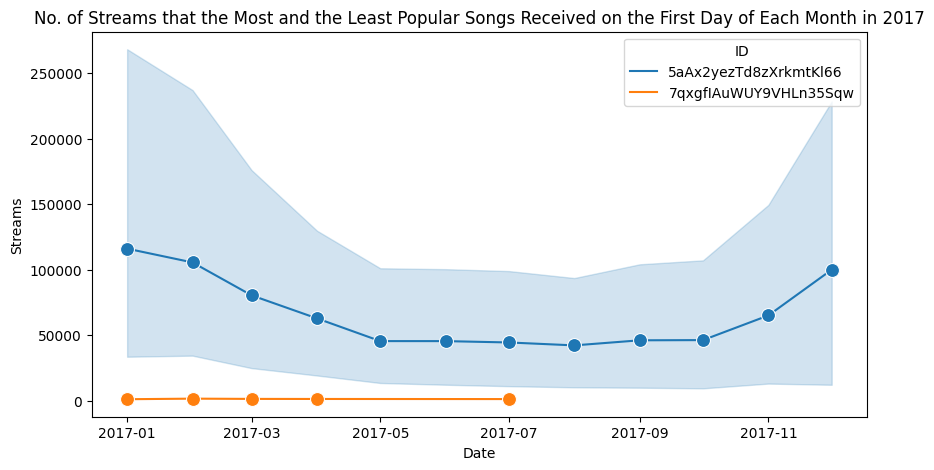

In [51]:
# TODO: Plot a line chart
filtered = rankings_df[(rankings_df['Date'].dt.year == 2017) & (rankings_df['Date'].dt.day == 1)]

# Find songs with the most and least streams on 2017-01-01
data_jan = filtered[filtered['Date'] == '2017-01-01']
song_max = data_jan[data_jan['Streams'] == data_jan['Streams'].max()].reset_index()['ID']
song_min = data_jan[data_jan['Streams'] == data_jan['Streams'].min()].reset_index()['ID']

# Find the no. of streams for these two songs on the first day of each month in 2017
songs_filtered = filtered[filtered['ID'].isin([song_max[0], song_min[0]])]

# Plot a line graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=songs_filtered, x='Date', y='Streams', hue='ID', marker='o', markersize=10)
plt.title('No. of Streams that the Most and the Least Popular Songs Received on the First Day of Each Month in 2017')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.show()

## Part 4: Working with Text Data

Now, let's switch gears and try to text-based analysis. Textual data is complex, but can also be used to generate extremely interpretable results, making it both valuable and interesting. 

Throughout this section, we will attempt to answer the following question:

**According to the `songs_df` dataframe, what do the reviews for the Top Tracks of 2017 look like?**


### 4.1 Tokenizing the text

We are going to split the contents of in the Reviews column into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. Now, this homework would be interminably long if we went into all the details of nltk. Thus, we are only going to use the following components of the library:
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis

Note that for this question, we didn't have to clean the text data first as our original dataset was well-formatted. However, in practice, we would typically clean the text first using regular expressions (regex). Keep this in mind as you work on the project later on in the semester.

**TODO:** Perform the following tasks:
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenize the text
2. Keep tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Convert each token to lowercase
4. Remove stopwords (commonly used words such as "a", "an", "in")


In [52]:
import nltk
nltk.__version__

'3.8.1'

In [53]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
# TODO: tokenize and flatten
def tokenize_content(content):
    token = nltk.tokenize.word_tokenize(content)
    alpha = [x for x in token if x.isalpha()]
    return [x.lower() for x in alpha if x.lower() not in stopwords]

**TODO**: Also perform the following tasks: 
- Extract the `reviews` column of `songs_df` as a list called `reviews`. 
- Apply your `tokenize_content()` function to each item in the list `reviews`. Call the resultant list `top_tokens_list`. 
- Flatten the list `top_tokens_list`, and call the resultant list **top_tokens**. The autograder will be examining the contents of this list.

In [66]:
# TODO: tokenize and flatten
reviews = list(songs_df['reviews'])
top_tokens_list = [tokenize_content(x) for x in reviews]
top_tokens = sum(top_tokens_list, [])
'''
top_tokens = [token for tokens in top_tokens_list for token in tokens]
'''
top_tokens

['vocal',
 'nice',
 'warm',
 'quality',
 'european',
 'feeling',
 'like',
 'singer',
 'makes',
 'words',
 'flow',
 'effortlessly',
 'subtle',
 'latin',
 'feel',
 'unique',
 'quirky',
 'arrangement',
 'good',
 'nicely',
 'thought',
 'liked',
 'tune',
 'good',
 'luck',
 'tastefully',
 'put',
 'together',
 'song',
 'good',
 'instrumentation',
 'melody',
 'good',
 'job',
 'voice',
 'awesome',
 'voice',
 'legendary',
 'shown',
 'quality',
 'song',
 'reminds',
 'something',
 'would',
 'sing',
 'unique',
 'style',
 'really',
 'cool',
 'voice',
 'like',
 'way',
 'exploring',
 'idea',
 'lost',
 'love',
 'voice',
 'good',
 'timbre',
 'good',
 'tone',
 'vocals',
 'strong',
 'song',
 'nicely',
 'moody',
 'vocal',
 'tone',
 'nice',
 'warm',
 'voice',
 'think',
 'right',
 'voice',
 'lyrics',
 'beautiful',
 'song',
 'keep',
 'going',
 'unique',
 'interesting',
 'vocal',
 'presentation',
 'accentuation',
 'various',
 'phrasing',
 'smooth',
 'sound',
 'really',
 'matches',
 'theme',
 'best',
 'recordin

### 4.2 Most Frequent Words
**TODO**: Now, find the 20 most common words in the list `top_tokens`. Save the result as a list of `(word, count)` tuples, in descending order of `count`.

**Hint**: For this question, you can use `Counter` from the Python `collections` library: https://docs.python.org/2/library/collections.html#counter-objects

In [71]:
# TODO: find the 20 most common words in the list
from collections import Counter

top_most_common = Counter(top_tokens).most_common(20)
top_most_common

[('good', 35),
 ('nice', 31),
 ('like', 26),
 ('song', 21),
 ('voice', 18),
 ('great', 14),
 ('really', 13),
 ('unique', 12),
 ('lyrics', 12),
 ('sound', 11),
 ('love', 9),
 ('interesting', 9),
 ('vocal', 8),
 ('tune', 8),
 ('vocals', 8),
 ('instrumentation', 7),
 ('melody', 7),
 ('music', 7),
 ('feel', 6),
 ('overall', 6)]

### 4.3 Word Clouds

Before we move on from this dataset, let's visualize our results using a word cloud.

**TODO**: Create a word cloud containing all the words in the list `top_tokens` (created in question 4.1). [The WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains instructions on how to do this. 

*Please make sure your wordcloud has a **white** background.*

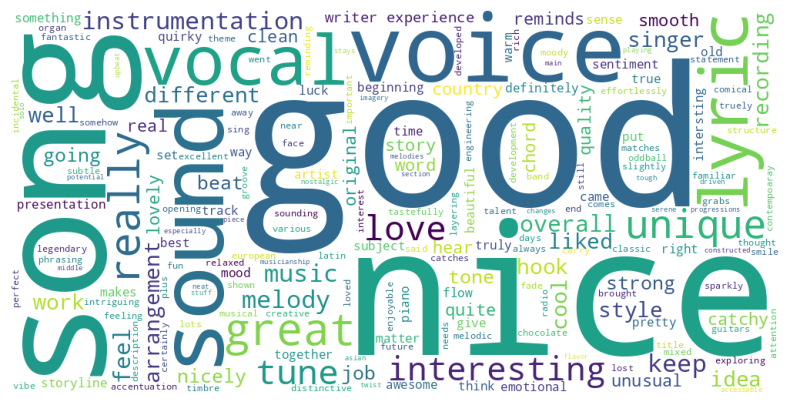

In [89]:
# TODO: make a word cloud for top tokens (MANUALLY GRADED)
from wordcloud import WordCloud

wordcloud = ' '.join(top_tokens)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()